Number of removed 250


Text(0.5, 1.0, 'Windrose für die Ausbreitungsstatistik Test.')

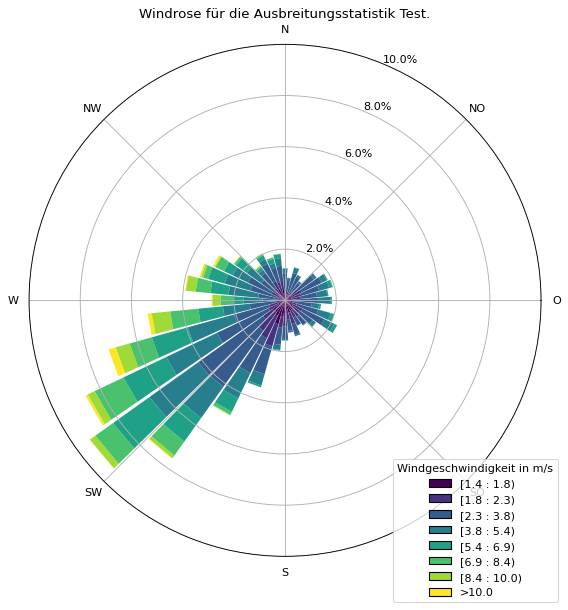

In [22]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from windrose import plot_windrose

f = open("oschatz_06.akterm", "r")

# Find the number of rows to skip in the *.akterm file
# We do not want to read the header information
skiprows=-1
for line_no, line in enumerate(f, start=1):
  if "AK" in line[:2]:
    skiprows = line_no-1
    break

f.close()

if skiprows==-1:
  print("Not a valid *.akterm file.")

df = pd.read_csv("oschatz_06.akterm", skiprows=skiprows, header=None, delim_whitespace=True)

# Remove Missing values
origlen=len(df)
df = df[(df[7]< 9) & (df[8]<9)]
validlen=len(df)

print("Number of removed " + str((origlen-validlen)))

# Set the windspeed in m/s
df["speed"] = df.apply(lambda x:x[10]*0.51444 if x[8]==0 else x[10]/10, axis=1, result_type='expand')
df["direction"] = df[9]

nsector=36
binsrange = [1.4, 1.8, 2.3, 3.8, 5.4, 6.9, 8.4, 10]
ax = WindroseAxes.from_ax(theta_labels=["O", "NO", "N", "NW", "W", "SW", "S", "SO"])
ax.bar(df["direction"],df["speed"],normed=True,bins=binsrange, nsector=nsector, opening=0.9)

# Find scale 
df["bin"] = pd.cut(df["direction"], nsector)
smax = round((df.groupby(by="bin")["bin"].count()/len(df)).max()*100,-1)
smin = smax / 5
sstep = smin

steps = np.arange(smin, smax+sstep, step=sstep)
ax.set_yticks(steps)
labels = ["{}%".format(i) for i in steps]
ax.set_yticklabels(labels)

ax.legend(bbox_to_anchor=(0.7, -0.1), title="Windgeschwindigkeit in m/s")
plt.title("Windrose für die Ausbreitungsstatistik {}.".format("Test"))

In [48]:

#ws = np.random.random(500) * 6
#wd = np.random.random(500) * 360

#ax = WindroseAxes.from_ax()
#ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
#ax.set_legend()